<a href="https://colab.research.google.com/github/MhammadRezaValiYari/loan-validation/blob/main/Loan_validation_with_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import essensional library

In [1]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
drive.mount('/content/drive', force_remount=True)
!ls '/content/drive/MyDrive/loan_data_set.csv'
data = pd.read_csv('/content/drive/MyDrive/loan_data_set.csv')
df = pd.DataFrame(data)
df.head(4)

Mounted at /content/drive
/content/drive/MyDrive/loan_data_set.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


# Data Cleaning

In [3]:
df = df.drop(['Loan_ID'], axis='columns')

In [4]:
def replace(df, col, rep1, rep2):
  df[col] = df[col].replace(rep1, rep2)
  return df

In [5]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [6]:
replace(df = df, col = 'Gender', rep1 = 'Male', rep2 = 0)
replace(df = df, col = 'Gender', rep1 = 'Female', rep2 = 1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,0.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,0.0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,0.0,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,0.0,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
replace(df = df, col = 'Married', rep1 = 'No', rep2 = 0)
replace(df = df, col = 'Married', rep1 = 'Yes', rep2 = 1)
replace(df = df, col = 'Self_Employed', rep1 = 'No', rep2 = 0)
replace(df = df, col = 'Self_Employed', rep1 = 'Yes', rep2 = 1)
replace(df = df, col = 'Loan_Status', rep1 = 'N', rep2 = -1)
replace(df = df, col = 'Loan_Status', rep1 = 'Y', rep2 = 1)
replace(df = df, col = 'Property_Area', rep1 = 'Urban', rep2 = 0)
replace(df = df, col = 'Property_Area', rep1 = 'Rural', rep2 = 1)
replace(df = df, col = 'Education', rep1 = 'Not Graduate', rep2 = 0)
replace(df = df, col = 'Education', rep1 = 'Graduate', rep2 = 1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,-1
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1
610,0.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,1,1
611,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,0,1
612,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,0,1


In [8]:
df.drop(df[(df['Property_Area'] == 'Semiurban')].index, inplace=True)

In [9]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
replace(df = df, col = 'Dependents', rep1 = '3+', rep2 = 3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,-1
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,0.0,1.0,0,1,0.0,3232,1950.0,108.0,360.0,1.0,1,1
609,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1
610,0.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,1,1
611,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,0,1


In [11]:
df.isna().sum()

,0
Gender,7
Married,1
Dependents,9
Education,0
Self_Employed,22
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,17
Loan_Amount_Term,11
Credit_History,34


In [12]:
df.fillna(method='bfill', inplace=True)

In [13]:
df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


#Correlation matrix



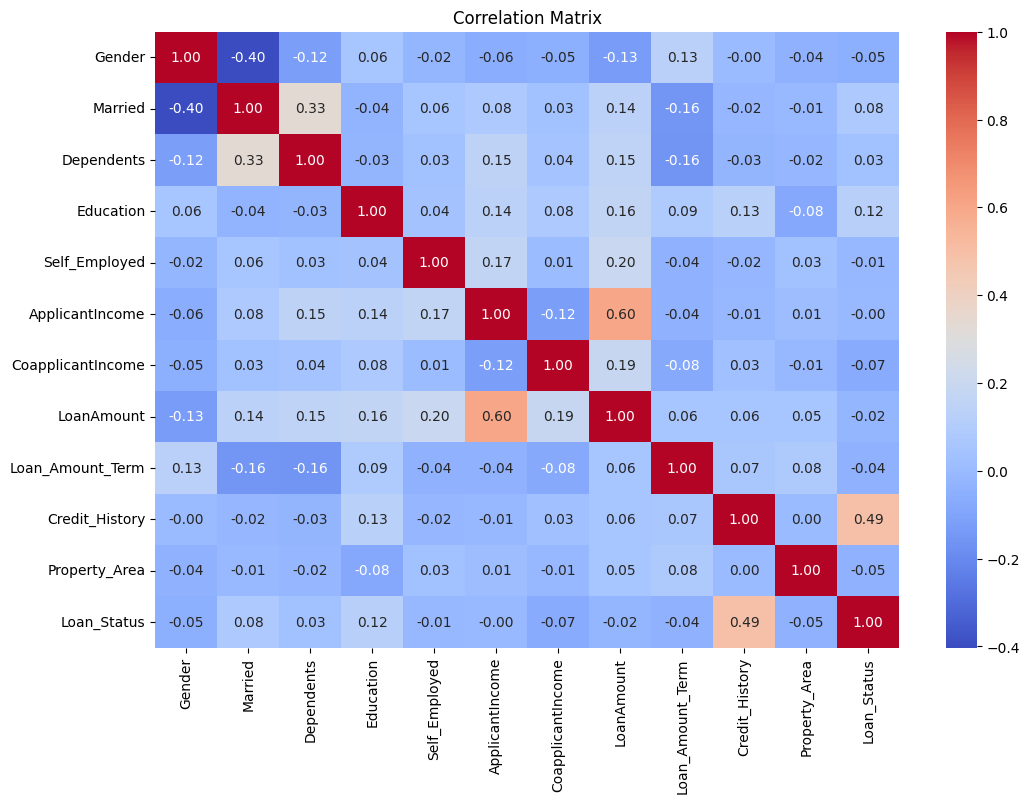

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = df.drop(columns='Loan_Status')
y = df['Loan_Status']
df_scaled = sc.fit_transform(x)
scaled_df = pd.DataFrame(df_scaled, columns=x.columns)

In [16]:
scaled_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.419435,-1.365526,-0.759652,0.548034,-0.401977,0.057534,-0.514868,-0.218059,0.312973,0.457738,-0.941349
1,-0.419435,0.732318,0.224795,0.548034,-0.401977,-0.135395,-0.053559,-0.218059,0.312973,0.457738,1.062305
2,-0.419435,0.732318,-0.759652,0.548034,2.487706,-0.376632,-0.514868,-0.938073,0.312973,0.457738,-0.941349
3,-0.419435,0.732318,-0.759652,-1.824704,-0.401977,-0.440179,0.206463,-0.310964,0.312973,0.457738,-0.941349
4,-0.419435,-1.365526,-0.759652,0.548034,-0.401977,0.080545,-0.514868,-0.067088,0.312973,0.457738,-0.941349
...,...,...,...,...,...,...,...,...,...,...,...
376,-0.419435,0.732318,-0.759652,0.548034,-0.401977,-0.341277,0.081653,-0.450321,0.312973,0.457738,1.062305
377,2.384158,-1.365526,-0.759652,0.548034,-0.401977,-0.391871,-0.514868,-0.880007,0.312973,0.457738,1.062305
378,-0.419435,0.732318,2.193689,0.548034,-0.401977,-0.208086,-0.514868,-1.240014,-2.364630,0.457738,1.062305
379,-0.419435,0.732318,0.224795,0.548034,-0.401977,0.396302,-0.441450,1.233583,0.312973,0.457738,-0.941349


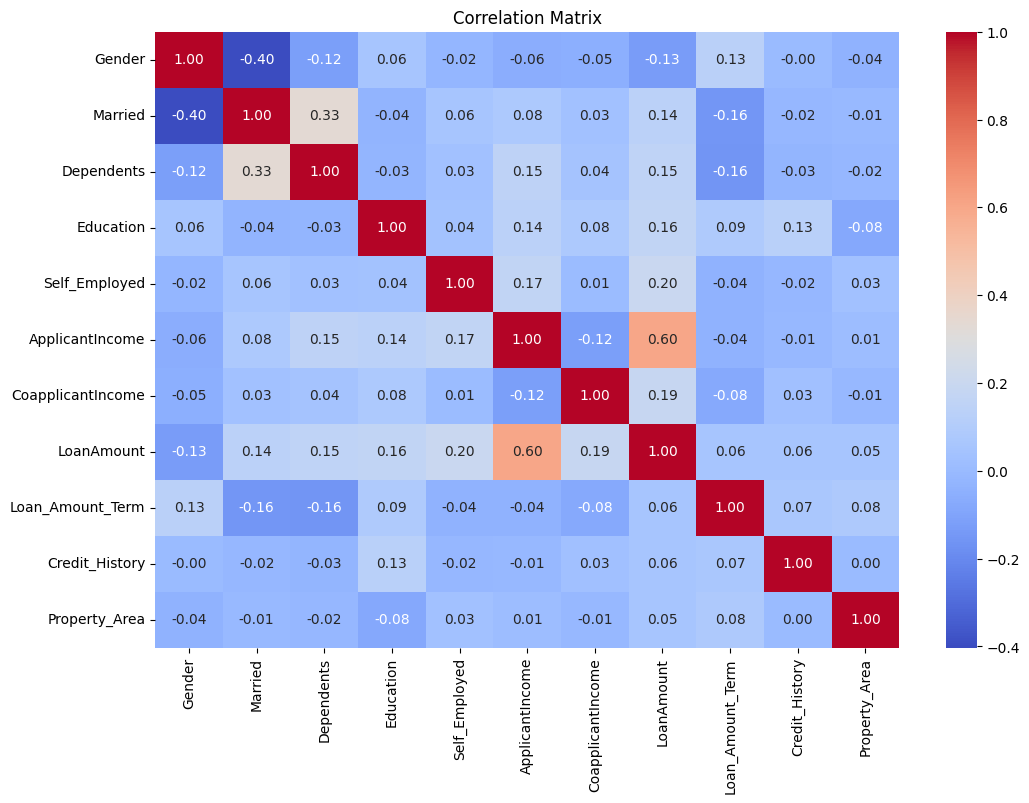

In [17]:
corr_matrix = scaled_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Mutual information & feature selection


In [18]:
from sklearn.feature_selection import mutual_info_classif

mu_scores = mutual_info_classif(scaled_df, y, random_state=42)
mu_df = pd.DataFrame({
    'Feature' : x.columns,
    'mutual_score' : mu_scores
})
mu_df.sort_values(by='mutual_score', ascending=False)

,Feature,mutual_score
9,Credit_History,0.076223
1,Married,0.062985
5,ApplicantIncome,0.028426
8,Loan_Amount_Term,0.027172
2,Dependents,0.018310
10,Property_Area,0.016659
4,Self_Employed,0.014713
0,Gender,0.000000
3,Education,0.000000
6,CoapplicantIncome,0.000000


In [19]:
mu_df[mu_df['mutual_score'] > 0.01]['Feature']

,Feature
1,Married
2,Dependents
4,Self_Employed
5,ApplicantIncome
8,Loan_Amount_Term
9,Credit_History
10,Property_Area


In [120]:
selected_features = scaled_df[['Credit_History', 'Property_Area', 'Loan_Amount_Term']]

In [121]:
selected_features

,Credit_History,Property_Area,Loan_Amount_Term
0,0.457738,-0.941349,0.312973
1,0.457738,1.062305,0.312973
2,0.457738,-0.941349,0.312973
3,0.457738,-0.941349,0.312973
4,0.457738,-0.941349,0.312973
...,...,...,...
376,0.457738,1.062305,0.312973
377,0.457738,1.062305,0.312973
378,0.457738,1.062305,-2.364630
379,0.457738,-0.941349,0.312973


In [153]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(selected_features, y, random_state=42, test_size=0.2, stratify=y)

In [154]:
x_train

,Credit_History,Property_Area,Loan_Amount_Term
84,0.457738,1.062305,0.312973
2,0.457738,-0.941349,0.312973
42,0.457738,-0.941349,0.312973
373,0.457738,1.062305,0.312973
339,-2.184657,1.062305,0.312973
...,...,...,...
183,0.457738,-0.941349,0.312973
86,0.457738,-0.941349,-2.364630
151,-2.184657,-0.941349,0.312973
103,0.457738,1.062305,0.312973


# Decision tree

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Dcmodel = DecisionTreeClassifier(random_state=42, max_depth=2)

In [156]:
Dcmodel.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [157]:
y_pred = Dcmodel.predict(x_test)

In [158]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7272727272727273

Classification Report:
              precision    recall  f1-score   support

          -1       0.82      0.32      0.46        28
           1       0.71      0.96      0.82        49

    accuracy                           0.73        77
   macro avg       0.77      0.64      0.64        77
weighted avg       0.75      0.73      0.69        77



## Checking Overfitting

In [148]:
train_pred = Dcmodel.predict(x_train)
test_pred = Dcmodel.predict(x_test)
print(f'train_accuracy_score: {accuracy_score(y_train, train_pred)}')
print(f'test_accuracy_score: {accuracy_score(y_test, test_pred)}')

train_accuracy_score: 0.7664473684210527
test_accuracy_score: 0.8051948051948052


In [149]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)
x_resampeld = sc.fit_transform(X_resampled)
x_test = sc.transform(x_test)

In [150]:
Dcmodel.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [151]:
Dcmodel.score(x_test, y_test)

0.8051948051948052

In [152]:
train_dist = pd.DataFrame(X_resampled).describe()
test_dist = pd.DataFrame(x_test).describe()
print(f'train_dist: {train_dist}')
print(f'test_dist: {test_dist}')

train_dist:        Credit_History  Property_Area  Loan_Amount_Term
count      394.000000     394.000000        394.000000
mean        -0.152562       0.062991         -0.000449
std          1.115053       0.999266          1.024094
min         -2.184657      -0.941349         -4.863726
25%          0.457738      -0.941349          0.312973
50%          0.457738       0.218076          0.312973
75%          0.457738       1.062305          0.312973
max          0.457738       1.062305          2.098041
test_dist:                0          1          2
count  77.000000  77.000000  77.000000
mean    0.054982  -0.171998   0.102442
std     0.969007   0.995916   0.760965
min    -1.824738  -1.006356  -2.311495
25%     0.548024  -1.006356   0.306437
50%     0.548024  -1.006356   0.306437
75%     0.548024   1.001319   0.306437
max     0.548024   1.001319   2.051725
